In [1]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [200]:
expected = 5
observed = 7
sample_size = 10000000
rv = scipy.stats.poisson(expected)

In [201]:
r = scipy.stats.poisson.rvs(expected, size=sample_size)

In [202]:
chi2 = (expected-r)**2/expected
observed_chi = (observed-expected)**2/expected
p_value_chi = len(np.where(chi2 > observed_chi)[0])/sample_size
print("Observed sigma with Pearson's Chi2: %g" % scipy.stats.norm.ppf((1-p_value_chi/2)))

Observed sigma with Pearson's Chi2: 1.13131


In [204]:
l = 2*(r*np.log(r/expected)+expected-r)
observed_l = 2*(observed*np.log(observed/expected)+expected-observed)
p_value_l = len(np.where(l > observed_l)[0])/sample_size
print("Observed sigma with likelihood ratio: %g" % scipy.stats.norm.ppf((1-p_value_l/2)))

Observed sigma with likelihood ratio: 0.856885


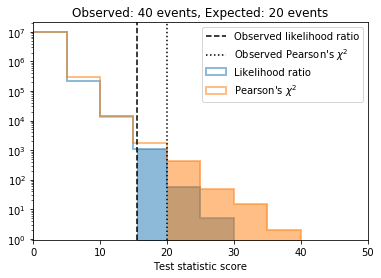

In [199]:
fig, ax = plt.subplots(1, 1)
n, bins, patches = ax.hist(
    l,
    alpha=0.5,
    bins=10,
    histtype="step",
    linewidth=2,
    label="Likelihood ratio",
    range=(0, 50))
fill = plt.axvspan(observed_l, 50, clip_path=patches[0], color="#1f77b4", alpha=0.5)

n, bins, patches = ax.hist(
    chi2,
    alpha=0.5,
    bins=10,
    histtype="step",
    linewidth=2,
    label=r"Pearson's $\chi^2$",
    range=(0, 50))
fill = plt.axvspan(observed_chi, 50, clip_path=patches[0], color="#ff7f0e", alpha=0.5)

ax.set_xlabel("Test statistic score")
ax.set_yscale("log")
ax.axvline(
    x=observed_l,
    linestyle="--",
    color="k",
    label=r"Observed likelihood ratio")
ax.axvline(
    x=observed_chi,
    linestyle=":",
    color="k",
    label=r"Observed Pearson's $\chi^2$")
ax.legend()
ax.set_xlim(0,50)
t = ax.set_title("Observed: %g events, Expected: %g events" % (observed, expected))
